Problem 2 ciał


**Euler:**

$$
\mathbf{r}(t + \delta t) = \mathbf{r}(t) + \mathbf{v}(t)\delta t + \frac{1}{2}\frac{\mathbf{F}(t)}{m}\delta t^2
$$

$$
\mathbf{p}(t + \delta t) = \mathbf{p}(t) + \mathbf{F}(t)\delta t
$$


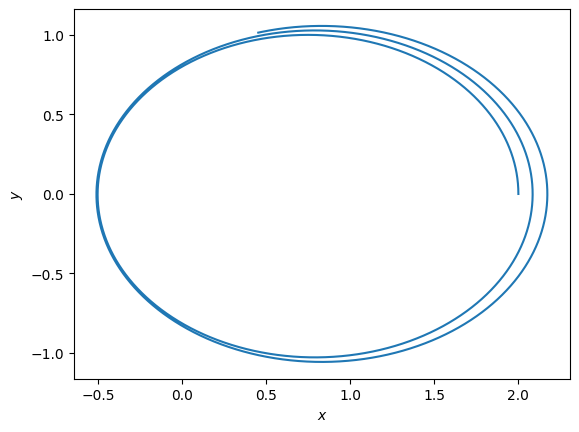

Energy
[0.05       0.05000008 0.05000025 ... 0.26286156 0.2634182  0.26397664]
[-0.25       -0.25000005 -0.25000019 ... -0.44899693 -0.44955365
 -0.45011217]


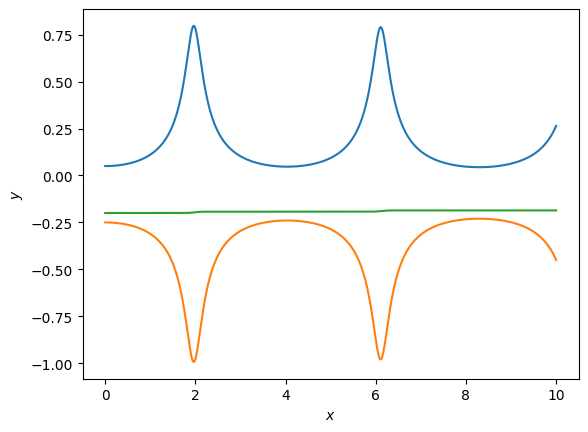

In [81]:
import numpy as np
import matplotlib.pyplot as plt

m = 0.1
M = 500.0
G = 0.01
dt = 0.001

# M nieruchome i w środku układu współrzędnych

r0 = np.array([2.0, 0])
p0 = np.array([0, 0.1])

def kinetic_energy(p):
    p_square = np.einsum('ij,ij->i', p, p)
    return p_square / (2 * m)

def potential_energy(r):
    E = []
    magnitudes = np.linalg.norm(r, axis=1)
    for ri in r:
        x, y = ri
        magnitude = np.sqrt(x ** 2 + y ** 2)
        if magnitude == 0:
            raise ValueError("Zero vector has no direction — cannot compute unit vector.")
        E.append((-1) * G * M * m / magnitude)
    return (-1) * G * M * m / magnitudes

def unit_vector(r):
    x, y = r
    magnitude = np.sqrt(x**2 + y**2)
    if magnitude == 0:
        raise ValueError("Zero vector has no direction — cannot compute unit vector.")
    return r / magnitude

def force(r):
    k = ((-1)*G*M*m) / np.dot(r, r)
    return unit_vector(r)*k

def trajectory(r0, p0, steps=1000):
    r = np.array([r0])
    p = np.array([p0])
    t = np.array([0])
    for _ in range(steps):
        ri = r[-1]
        pi = p[-1]
        F = force(ri)
        a = F / m
        rii = ri + pi * dt / m + (0.5) * a * dt**2
        pii = pi + m * a * dt
        r = np.append(r, [rii], axis=0)
        p = np.append(p, [pii], axis=0)
        t = np.append(t, t[-1] + dt)

    return r, p, t

r, p, t = trajectory(r0, p0, steps=10000)

plt.plot(r[:,0], r[:,1])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("euler.png")
plt.show()

print("Energy")

Ek = kinetic_energy(p)
Ep = np.array(potential_energy(r))
E = Ep + Ek



plt.plot(t, Ek)
plt.plot(t, Ep)
plt.plot(t, E)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("euler.png")
plt.show()




Problem 2 ciał


**Verlet:**

$$r(t + \delta t) = 2r(t) - r(t - \delta t) + \left(\frac{F(t)}{m}\right)\delta t^2$$



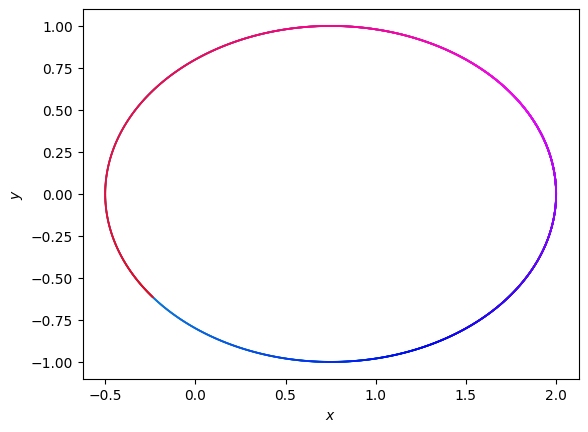

Energy


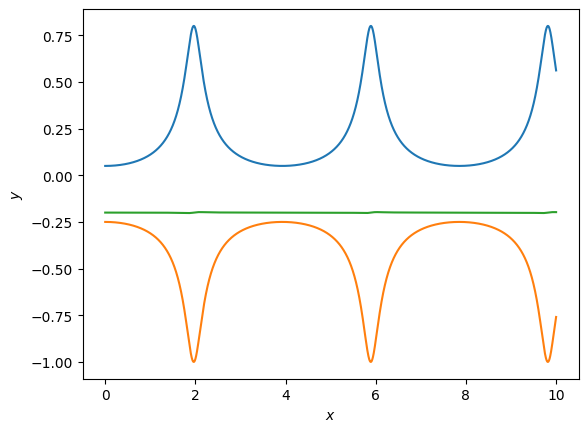

In [92]:
import numpy as np
import matplotlib.pyplot as plt

m = 0.1
M = 500.0
G = 0.01
dt = 0.001

# M nieruchome i w środku układu współrzędnych

r0 = np.array([2.0, 0])
p0 = np.array([0, 0.1])

def kinetic_energy(p):
    p_square = np.einsum('ij,ij->i', p, p)
    return p_square / (2 * m)

def potential_energy(r):
    E = []
    magnitudes = np.linalg.norm(r, axis=1)
    for ri in r:
        x, y = ri
        magnitude = np.sqrt(x ** 2 + y ** 2)
        if magnitude == 0:
            raise ValueError("Zero vector has no direction — cannot compute unit vector.")
        E.append((-1) * G * M * m / magnitude)
    return (-1) * G * M * m / magnitudes


def unit_vector(r):
    x, y = r
    magnitude = np.sqrt(x**2 + y**2)
    if magnitude == 0:
        raise ValueError("Zero vector has no direction — cannot compute unit vector.")
    return r / magnitude

def force(r):
    k = ((-1)*G*M*m) / np.dot(r, r)
    return unit_vector(r)*k

def trajectory( r0, p0, steps=1000):
    r = np.array([r0 - p0 * dt / m, r0])
    p = np.array([p0, p0])
    t = np.array([(-1)*dt, 0])
    for _ in range(steps):
        ri = r[-1]
        r_1 = r[-2]
        pi = p[-1]
        F = force(ri)
        a = F / m
        rii = 2*ri - r_1 + a * dt**2
        pii = m * (ri - r_1) / dt
        r = np.append(r, [rii], axis=0)
        p = np.append(p, [pii], axis=0)
        t = np.append(t, t[-1] + dt)

    return r, p, t

r, p, t = trajectory(r0, p0, steps=10000)

plt.scatter(r[:,0], r[:,1], c=t, cmap='hsv', s=.1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("euler.png")
plt.show()

print("Energy")

Ek = kinetic_energy(p)
Ep = np.array(potential_energy(r))
E = Ep + Ek



plt.plot(t, Ek)
plt.plot(t, Ep)
plt.plot(t, E)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("euler.png")
plt.show()



Problem 2 ciał


**Frog:**

$$v(t + \frac{δt}{2}) = v(t - \frac{δt}{2}) + (\frac{F(t)}{m})Δt$$

$$r(t + δt) = r(t) + v(t + \frac{δt}{2})Δt$$



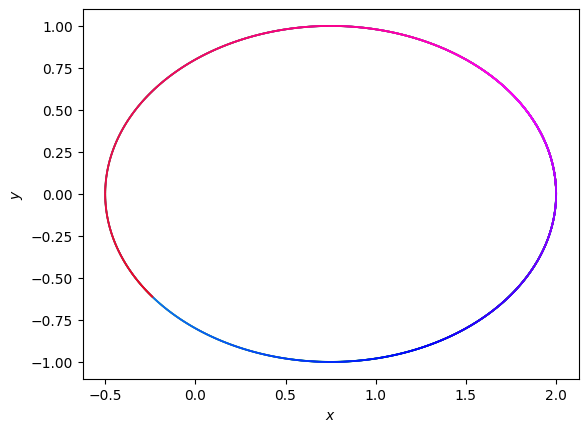

Energy


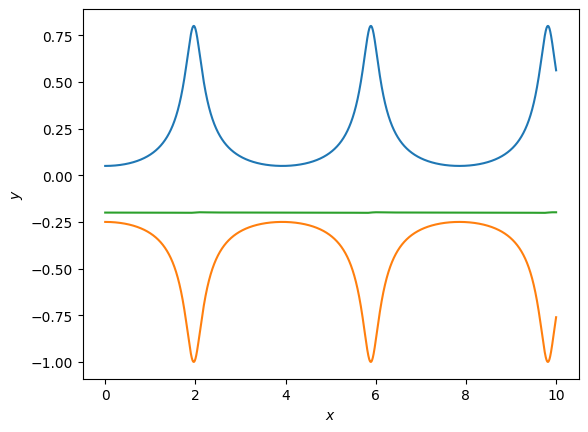

In [103]:
import numpy as np
import matplotlib.pyplot as plt

m = 0.1
M = 500.0
G = 0.01
dt = 0.001

# M nieruchome i w środku układu współrzędnych

r0 = np.array([2.0, 0])
p0 = np.array([0, 0.1])


def kinetic_energy(p):
    p_square = np.einsum('ij,ij->i', p, p)
    return p_square / (2 * m)

def potential_energy(r):
    E = []
    magnitudes = np.linalg.norm(r, axis=1)
    for ri in r:
        x, y = ri
        magnitude = np.sqrt(x ** 2 + y ** 2)
        if magnitude == 0:
            raise ValueError("Zero vector has no direction — cannot compute unit vector.")
        E.append((-1) * G * M * m / magnitude)
    return (-1) * G * M * m / magnitudes

def unit_vector(r):
    x, y = r
    magnitude = np.sqrt(x**2 + y**2)
    if magnitude == 0:
        raise ValueError("Zero vector has no direction — cannot compute unit vector.")
    return r / magnitude

def force(r):
    k = ((-1)*G*M*m) / np.dot(r, r)
    return unit_vector(r)*k

def trajectory( r0, p0, steps=1000):
    r = np.array([r0])
    p_half = np.array([p0 - force(r0) * dt / 2])
    p = np.array([p0])
    t = np.array([0])
    for _ in range(steps):
        ri = r[-1]
        pi_half = p_half[-1]
        F = force(ri)
        pii_half = pi_half + F * dt
        rii = ri + pii_half * dt / m
        pii = pii_half - F * dt / 2
        r = np.append(r, [rii], axis=0)
        p_half = np.append(p_half, [pii_half], axis=0)
        p = np.append(p, [pii], axis=0)
        t = np.append(t, t[-1] + dt)

    return r, p, t

r, p, t = trajectory(r0, p0, steps=10000)

plt.scatter(r[:,0], r[:,1], c=t, cmap='hsv', s=.1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("euler.png")
plt.show()

print("Energy")

Ek = kinetic_energy(p)
Ep = np.array(potential_energy(r))
E = Ep + Ek




plt.plot(t, Ek)
plt.plot(t, Ep)
plt.plot(t, E)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("euler.png")
plt.show()


